---
title: stata教程10-项目反应使用irt命令进行单参数logit参数估计
date: 2018-12-23 17:17:55
tags: [stata]
toc: true

---


<span></span>
<!-- more -->

上一篇文章我们介绍了如何使用clogit命令估计题目的难度参数, 从这篇文章开始我们主要是介绍一下stata进行项目反应分析的原理。下面我们开始使用stata本身就支持的irt命令, 用更好的工具进行项目特征的分析。

### 加载数据

我们仍然使用上一篇的数据, 可以直接从网络中加载数据:

In [1]:
use http://www.stata.com/support/faqs/dta/raschfaq, clear

这个数据是有10题目, 120个学生作答，编码为1（正确）和0（不正确）。我们想知道10个题目的难度和120个学生的能力值。

下面加载我们列出数据的前几行看看数据的结构:

In [2]:
list in 1/10


     +-----------------------------------------------------------------------------------------------------------------------------+
     |   math1     math2       math3       math4       math5       math6       math7       math8       math9      math10   subj_id |
     |-----------------------------------------------------------------------------------------------------------------------------|
  1. | correct   correct     correct   incorrect   incorrect   incorrect   incorrect   incorrect   incorrect   incorrect         1 |
  2. | correct   correct   incorrect   incorrect     correct     correct     correct   incorrect   incorrect   incorrect         2 |
  3. | correct   correct   incorrect   incorrect     correct   incorrect   incorrect   incorrect   incorrect   incorrect         3 |
  4. | correct   correct     correct   incorrect     correct   incorrect     correct   incorrect   incorrect   incorrect         4 |
  5. | correct   correct     correct   incorrect   incorrect     cor

变量math1-math10是10道题目的得分, 他们显示成了文本"incorrect"和"correct", 这只是分数的标签, 实际上他们存储的是0和1。最后一列是被试的id。

### 拟合模型

我们使用irt 1pl命令进行单参数logit模型的拟合, 后的变量制定了10个math变量。

In [6]:
irt 1pl math1-math10


Fitting fixed-effects model:

Iteration 0:   log likelihood = -724.16318  
Iteration 1:   log likelihood = -723.35014  
Iteration 2:   log likelihood = -723.34959  
Iteration 3:   log likelihood = -723.34959  

Fitting full model:

Iteration 0:   log likelihood = -705.13593  
Iteration 1:   log likelihood = -695.54708  
Iteration 2:   log likelihood = -695.52399  
Iteration 3:   log likelihood = -695.52398  

One-parameter logistic model                    Number of obs     =        120
Log likelihood = -695.52398
------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     Discrim |   .9176656   .1159959     7.91   0.000     .6903179    1.145013
-------------+----------------------------------------------------------------
math1        |
        Diff |  -1.818811   .3417085    -5.32   0.000    -2.488548   

对于单参数模型, 由于区分度参数对于所有项目都是相同的，因此仅列出一次。估计
0.92表示区分度较差; 也就是说，在给定的难度估计附近，任何两个
具有不同能力的学生将具有类似的预测成功概率。如果项目具有较好的区分度，则计算出的概率为
彼此相距甚远。

难度参数的估计对应于能力等级上Pr（Y = 1 |θ）= 0.5的点
。因为我们假设θ为零均值，所以如果题目难度分数为负数, 则相对容易
如果难度估计为正，则题目的难度相对较难。

在下文中，我们使用`estat report`命令来重新显示估计的IRT参数和
输出报告。我们使用`byparm`选项，它通过参数排列输出结果, 
而不是按项目，使用sort（b）选项，它以升序显示题目难度。这使得很容易看到math1最简单，而math10最难。

In [7]:
 estat report, byparm sort(b)


One-parameter logistic model                    Number of obs     =        120
Log likelihood = -695.52398
------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     Discrim |   .9176656   .1159959     7.91   0.000     .6903179    1.145013
-------------+----------------------------------------------------------------
Diff         |
       math1 |  -1.818811   .3417085    -5.32   0.000    -2.488548   -1.149075
       math2 |   -1.56836   .3161411    -4.96   0.000    -2.187985   -.9487346
       math3 |  -.9815245   .2683143    -3.66   0.000    -1.507411   -.4556381
       math4 |  -.2567456   .2369981    -1.08   0.279    -.7212534    .2077622
       math5 |   -.170697   .2356485    -0.72   0.469    -.6325597    .2911656
       math6 |    .257779   .2369481     1.09   0.277    -.2066307    .7221887
       m

下面我们绘制ICC曲线。ICC曲线横坐标是能力, 纵坐标是回答正确的概率, 而不同颜色的曲线代表不同的题目。下面, 我们使用`irtgraph icc`来绘制ICC曲线。`blocation`参数用于显示50%正确率对应的能力值(也就是难度), `legend`用来控制图例, 

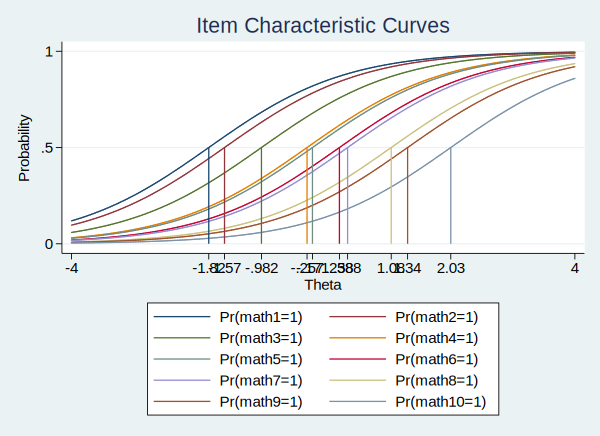

In [9]:
 irtgraph icc, blocation 

测验特征曲线TCC使用估计的1PL参数将试卷平均得分绘制为$\theta$的函数。我们用
`irtgraph tcc`绘制TCC。对于10个二分得分题，很明显总得分范围从0到10. 
`thetalines` 选项在指定的$\theta$值处绘制得分。

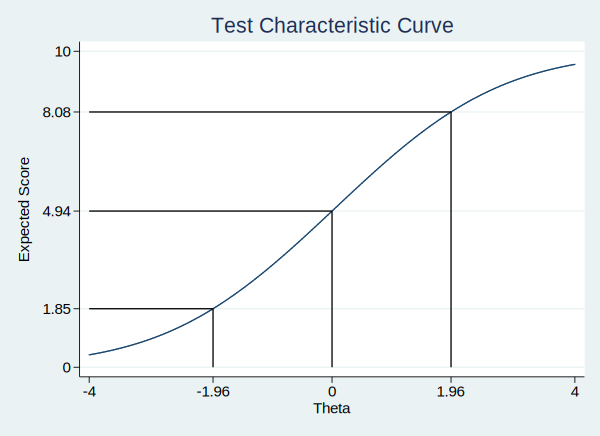

In [10]:
 irtgraph tcc, thetalines(-1.96 0 1.96)

这个图告诉我们对不同能力水平的人有什么样的试卷分数。
例如，我们可以预期高于平均水平的人得分4.94或以上。


使用标准正态分布（-1.96和1.96）的95％临界值，该图
还告诉我们，我们可以预期95％的随机选择的人得分在1.85和8.08分之间。
同样，更现实的说法是，我们预计大约95％的随机选择的人得分
在2到8之间。

`irtgraph iif`可以绘制每个题目的信息函数（IIF）。

信息函数可作为描述、挑选测验试题、以及比对测验的相对效能的实用方法，且作为建立、分析与诊断测验的参考依据。 试题信息函数定义如下：

<img src="images/information-function.png" />

- $I_i$: 能力θ在试题i的试题信息
- $P_i$: 能力θ在试题i的答对几率
- $Q_i$: 能力θ在试题i的答错几率
- $P'_i$: 能力θ的反应函数导数

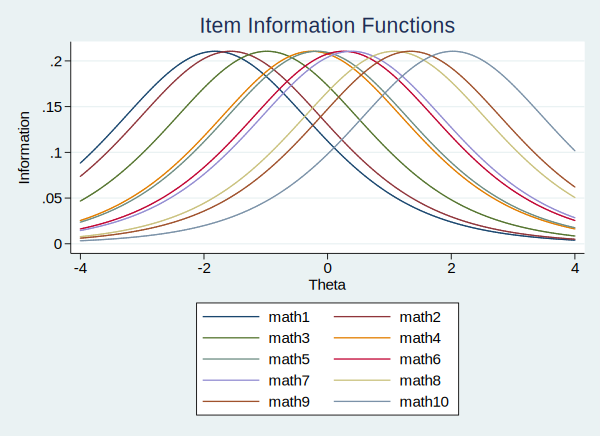

In [11]:
irtgraph iif

测试信息函数:

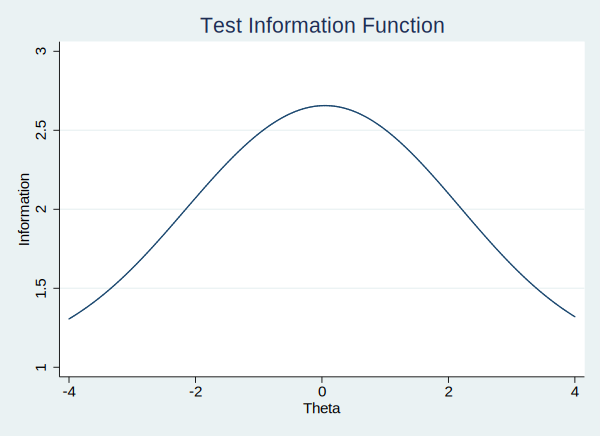

In [13]:
irtgraph tif

我们还有一个常用的功能就是需要估计每个学生的能力值, 用下面的命令:

In [14]:
predict Theta, latent

(option ebmeans assumed)
(using 7 quadrature points)


可以看一下Theta的基本情况:

In [23]:
codebook  Theta


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Theta                                                                                                                                                                                                                           empirical Bayes means for Theta
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (float)

                 range:  [-1.8855176,1.9160916]       units:  1.000e-09
         unique values:  11                       missing .:  0/120

                  mean:   5.9e-08
             

用能力值, 我们可以将每一个题目的正确率和学生的能力值会知道icc图上, 方便比较模型拟合情况与实际得分情况的对比:

下面我们以Theta作为分组变量, 然后求取所有题目的平均分:

In [24]:
collapse math*, by(Theta)

看一下目前的数据基本情况:

In [25]:
list


     +-------------------------------------------------------------------------------------------------------------------------+
     |     Theta      math1      math2      math3      math4      math5      math6      math7      math8      math9     math10 |
     |-------------------------------------------------------------------------------------------------------------------------|
  1. | -1.885518          0          0          0          0          0          0          0          0          0          0 |
  2. | -1.464075          1          0          0          0          0          0          0          0          0          0 |
  3. | -1.070907          0         .5        .75         .5        .25          0          0          0          0          0 |
  4. | -.6972789        .75        .75      .3125        .25      .1875        .25      .1875      .0625       .125       .125 |
  5. | -.3359977   .7619048   .7619048   .6666667   .4761905   .4285714   .4761905   .2380952   

我们可以把第一题math1的icc和能力与平均分绘制道图上:

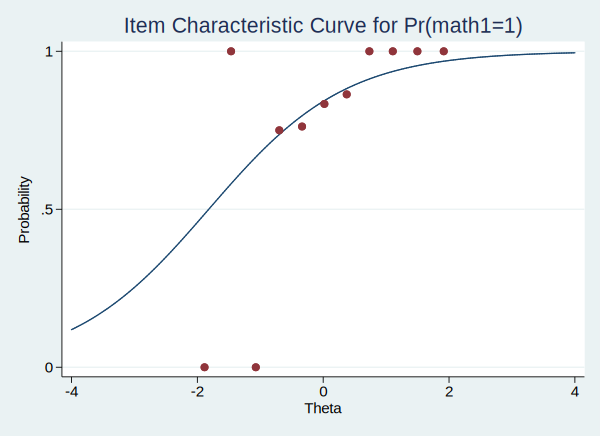

In [26]:
 irtgraph icc math1, addplot(scatter math1 Theta)

从上图中可以看出, 我们模型的拟合情况不太好, 尤其是低能力端, 点离曲线很远。

下面再看第二道题:


(note: file C:/Users/syd/.stata_kernel_cache/graph7.svg not found)


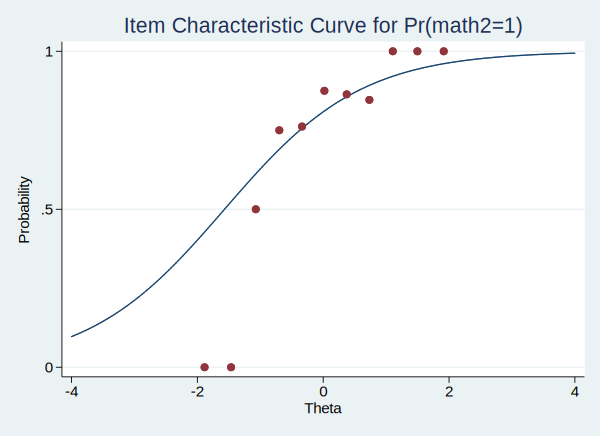

In [27]:
 irtgraph icc math2, addplot(scatter math2 Theta)

### 总结

Stata官方支持的进行IRT分析的工具就这些了, 再多就是更多的模型了, 而缺少一些基本的模型拟合指标和其他一些高级的分析工具, 不过下一篇文章我们测试一下raschtest模块, 这是一个第三方模块, 可以补充一些缺失的功能。